In [6]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from math import sqrt
import time
import kagglehub



#import gensim 
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize 
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve, auc

In [7]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv("/Users/gia/Downloads/training.1600000.processed.noemoticon.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

df.sample(5)

,target,ids,date,flag,user,text
108818,0,1824385524,Sun May 17 01:09:24 PDT 2009,NO_QUERY,athinkingman,@cloudgazer Too dodgy to follow fancy. Probabl...
679619,0,2249281782,Fri Jun 19 22:02:37 PDT 2009,NO_QUERY,chrissytinaaa,Trying to sleep = FAIL. Help!
187946,0,1968778871,Fri May 29 22:11:44 PDT 2009,NO_QUERY,mwstratton,@CrimsonMe you attacked my buddy Djarum it see...
752137,0,2286360584,Mon Jun 22 16:20:27 PDT 2009,NO_QUERY,liz_kantner,Painting my new room rather than going to movi...
123031,0,1833832397,Mon May 18 00:36:57 PDT 2009,NO_QUERY,jkington,"boooooh, walking home in rain"


In [8]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [9]:
print('length of our data is {} tweets'.format(len(df)))

length of our data is 1048576 tweets


In [10]:
print("The shape of our dataset is {}".format(df. shape))

The shape of our dataset is (1048576, 6)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [12]:
print(df.dtypes)

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object


In [13]:
print("number of missing values in the dataframe is {}".format(np.sum(df.isnull().any(axis=1))))

number of missing values in the dataframe is 0


In [14]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1048576


In [15]:
df['target'].unique()

array([0, 4])

In [16]:
df['target'].nunique()

2

In [17]:
print("the number of unique values of the target variable is {}".format(df['target'].nunique()))
print("unique values of target variable are {0} and {1}".format(df['target'].unique()[0],df['target'].unique()[1]))

the number of unique values of the target variable is 2
unique values of target variable are 0 and 4


In [18]:
df['target'] = df['target'].replace(4,1)

In [19]:
print("The number of unique values of the ids feature is {}".format(df['ids'].nunique()))

The number of unique values of the ids feature is 1048045


In [20]:
print("The number of unique values of the date feature is {}".format(df['date'].nunique()))

The number of unique values of the date feature is 662454


In [21]:
print("The number of unique values of the ids feature is {}".format(df['flag'].nunique()))
print("Unique values of ids feature are {}".format(df['flag'].unique()[0]))

The number of unique values of the ids feature is 1
Unique values of ids feature are NO_QUERY


In [22]:
print("The number of unique values of the user feature is {}".format(df['user'].nunique()))

The number of unique values of the user feature is 511365


In [23]:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))

The number of unique values of the text feature is 1036136


In [24]:
df.groupby('target').count()

,ids,date,flag,user,text
target,,,,,
0,800000,800000,800000,800000,800000
1,248576,248576,248576,248576,248576


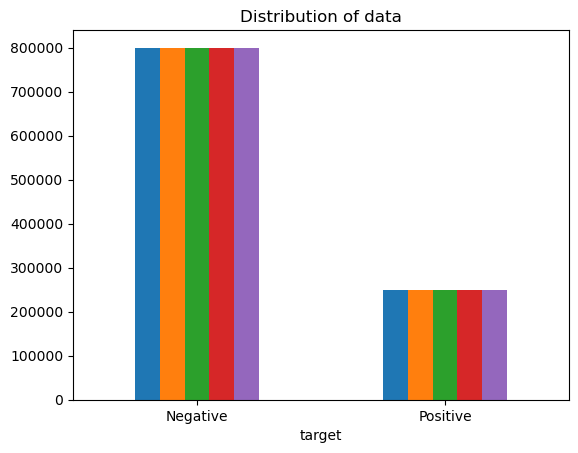

In [25]:
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

text, sentiment = list(df['text']), list(df['target'])


<Axes: xlabel='target', ylabel='count'>

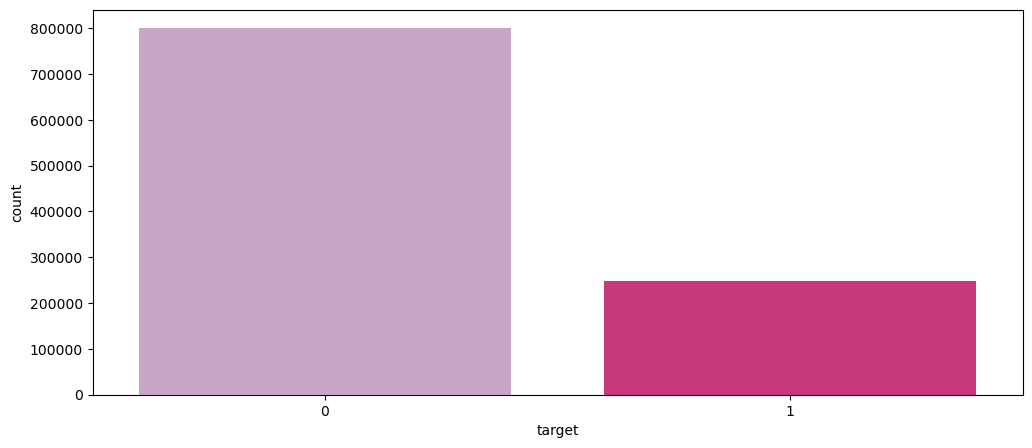

In [26]:
fig_dims = (12, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(data=df, x="target", palette="PuRd")

In [27]:
print("=========== Before Lowering case ============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Lowering case ===========\n")
df['text'] = df['text'].str.lower()
print("\t" + df.loc[10, "text"])

=========== Before Lowering case ============

	spring break in plain city... it's snowing 

=========== After Lowering case ===========

	spring break in plain city... it's snowing 


In [28]:
# Removal of Mentions:

def RemoveMentions(text):
    text_ = re.sub(r"@\S+", "", text)
    return text_

print("=========== Before Removing Mentions ============\n")
print("\t" + df.loc[5, "text"])
print("\n=========== After Removing Mentions ===========\n")
df["text"] = df["text"].apply(RemoveMentions)
print("\t" + df.loc[5, "text"])

=========== Before Removing Mentions ============

	@kwesidei not the whole crew 

=========== After Removing Mentions ===========

	 not the whole crew 


In [29]:
# remove punctuation
punctuations_list = string.punctuation

def RemovePunctuations(text):
    transformator = str.maketrans('', '', punctuations_list)
    return text.translate(transformator)

print("=========== Before Removing Punctuations =============\n")
print("\t" + df.loc[10, "text"])
print("\n=========== After Removing Punctuations \===========\n")
df["text"] = df["text"].apply(RemovePunctuations)
print("\t" + df.loc[10, "text"])

=========== Before Removing Punctuations =============

	spring break in plain city... it's snowing 

=========== After Removing Punctuations \===========

	spring break in plain city its snowing 


In [30]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [31]:
# Getting the pre defined stop words from nltk library :
import nltk
nltk.download('stopwords')

stopwords = stopwords.words('english')

df_copy1 = df.loc[:100].copy(deep=True)
df_copy2 = df.copy(deep=True)  

print("=========== Before Removing Stop words ============\n")
print("\t" + df_copy2.loc[12, "text"])
print("\n=========== After Removing Stop words ===========\n")

df_copy2['text'] = df_copy2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
print("\t" + df_copy2.loc[12, "text"])

[nltk_data] Downloading package stopwords to /Users/gia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


=========== Before Removing Stop words ============

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words ===========

	couldnt bear watch thought ua loss embarrassing


In [32]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [33]:
def RemoveStopsSpacy(text):
    nlp = English()

    my_doc = nlp(text)

    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    filtered_sentence = []

    for word in token_list:
        lexeme = nlp.vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word)
    return filtered_sentence


print("=========== Before Removing Stop words with spaCy ===========\n")
print("\t" + df_copy1.loc[12, "text"])
print("\n=========== After Removing Stop words with spaCy ===========\n")

df_copy1['text'] = df_copy1['text'].apply(lambda x: ' '.join(RemoveStopsSpacy(x)))
print("\t" + df_copy1.loc[12, "text"])

=========== Before Removing Stop words with spaCy ===========

	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with spaCy ===========

	  nt bear watch   thought ua loss embarrassing     


In [34]:
df.loc[12]

target                                                    0
ids                                              1467812723
date                           Mon Apr 06 22:20:19 PDT 2009
flag                                               NO_QUERY
user                                                   TLeC
text       i couldnt bear to watch it  and i thought the...
Name: 12, dtype: object

In [35]:
import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords

print("\t" + df.loc[12, "text"])
print("\n=========== After Removing Stop words with Gensim =======\n")

df['text'] = df['text'].apply(lambda x: remove_stopwords(x) if isinstance(x, str) else x)

print("\t" + df.loc[12, "text"])


	 i couldnt bear to watch it  and i thought the ua loss was embarrassing     

=========== After Removing Stop words with Gensim =======

	bear watch thought ua loss embarrassing


In [36]:
def RemoveLinks(text):
    return re.sub(r"http\S+", "", text)

print("=========== Before Removing Hyperlinks =======\n")
print("\t" + df.loc[0, "text"])  
print("\n=========== After Removing Hyperlinks =======\n")
df['text'] = df['text'].apply(RemoveLinks)
print("\t" + df.loc[0, "text"])

=========== Before Removing Hyperlinks =======

	httptwitpiccom2y1zl awww thats bummer shoulda got david carr day d

=========== After Removing Hyperlinks =======

	 awww thats bummer shoulda got david carr day d


In [37]:
def RemoveNumbers(text):       
    return re.sub(r"[0-9]+", "", text)

print("=========== Before Removing Numbers =======\n")
print("\t" + df.loc[2,"text"])  
print("\n=========== After Removing Numbers ========\n")
df['text'] = df['text'].apply(RemoveNumbers)
print("\t" + df.loc[2,"text"])

=========== Before Removing Numbers =======

	dived times ball managed save 50 rest bounds

=========== After Removing Numbers ========

	dived times ball managed save  rest bounds


In [38]:
def RemoveWhitespaces(text):
    text=text.strip()  
    return re.sub(r" +"," ",text)

df['text'] = df['text'].apply(lambda x: RemoveWhitespaces(x))

In [39]:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 965264
The total number of rows in our dataframe is : 1048576
The number of duplicated rows in our dataframe is : 83312


In [40]:
df = df.drop_duplicates(subset='text', keep='first')

In [41]:
print("The number of unique values of the text feature is {}".format(df['text'].nunique()))
print("The total number of rows in our dataframe is : {}".format(len(df)))
print("The number of duplicated rows in our dataframe is : {}".format(len(df)-df['text'].nunique()))

The number of unique values of the text feature is 965264
The total number of rows in our dataframe is : 965264
The number of duplicated rows in our dataframe is : 0


In [42]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [43]:
#df = pd.read_csv("/Users/gia/Downloads/training.1600000.processed.noemoticon.csv", encoding=DATASET_ENCODING, names=DATASET_COLUMNS)

df=df.drop(['ids', 'date', 'flag', 'user'], axis = 1)

In [44]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

if df.shape[0] > 1000:
    df = df.sample(n=1000, random_state=1)  

vectorizer = CountVectorizer(max_features=1000)
#vectorizer = CountVectorizer()

X = vectorizer.fit_transform(df['text'])

tokens = vectorizer.get_feature_names_out()

tokenized_tweets = pd.DataFrame(X.toarray(), columns=tokens)

print(df.head())



        target                                               text
833080       1  thanks keeping couple projects burner need rig...
862757       1             hi im sorry following said wont happen
773250       0  fan patti balgojevich crying money id donate c...
812294       1  sooo watched disaster movie absolutly hilariou...
178939       0  feeeel like ima die way rainforest need girls ...


In [45]:
from nltk.stem import PorterStemmer
import pandas as pd

stemmer = PorterStemmer()

def Stemmer(text):
    if isinstance(text, str):
        return " ".join([stemmer.stem(word) for word in text.split()])
    else:
        return ""

df['tokenized_tweets'] = tokenized_tweets.apply(lambda row: ' '.join(row.index[row > 0]), axis=1)

df['tokenized_tweets'] = df['tokenized_tweets'].fillna('')

df['tokenized_tweets_stemmed'] = df['tokenized_tweets'].apply(Stemmer)

print(df[['tokenized_tweets', 'tokenized_tweets_stemmed']].head())


       tokenized_tweets tokenized_tweets_stemmed
833080                                          
862757                                          
773250                                          
812294                                          
178939                                          


In [46]:
df.head(10)

,target,text,tokenized_tweets,tokenized_tweets_stemmed
833080,1,thanks keeping couple projects burner need rig...,,
862757,1,hi im sorry following said wont happen,,
773250,0,fan patti balgojevich crying money id donate c...,,
812294,1,sooo watched disaster movie absolutly hilariou...,,
178939,0,feeeel like ima die way rainforest need girls ...,,
613343,0,ppl tell steven save money live uggh increased...,,
292742,0,aw thats fun thanks letting know,,
897737,1,lets whats demand catch guys later amp good lu...,,
139742,0,agree sigh,,
101688,0,oh man sucks work place counsels divorcing par...,,


In [47]:
wordnet_lemmatizer = WordNetLemmatizer()

df['tokenized_tweets_stemmed_lemmatized'] = df['tokenized_tweets_stemmed'].apply(
    lambda text: wordnet_lemmatizer.lemmatize(text, pos="v"))

In [48]:
df.head(50)

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized
833080,1,thanks keeping couple projects burner need rig...,,,
862757,1,hi im sorry following said wont happen,,,
773250,0,fan patti balgojevich crying money id donate c...,,,
812294,1,sooo watched disaster movie absolutly hilariou...,,,
178939,0,feeeel like ima die way rainforest need girls ...,,,
613343,0,ppl tell steven save money live uggh increased...,,,
292742,0,aw thats fun thanks letting know,,,
897737,1,lets whats demand catch guys later amp good lu...,,,
139742,0,agree sigh,,,
101688,0,oh man sucks work place counsels divorcing par...,,,


In [49]:
df.to_csv("cleaned.csv")

In [50]:
df.head(2)

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized
833080,1,thanks keeping couple projects burner need rig...,,,
862757,1,hi im sorry following said wont happen,,,


In [51]:
def wordCloud(data_pos, max_words):
    cloud = WordCloud(max_words=max_words, background_color="white", width=1600, height=800,
                      collocations=False).generate(" ".join(data_pos))
    plt.figure(figsize=(20, 20))
    plt.imshow(cloud)

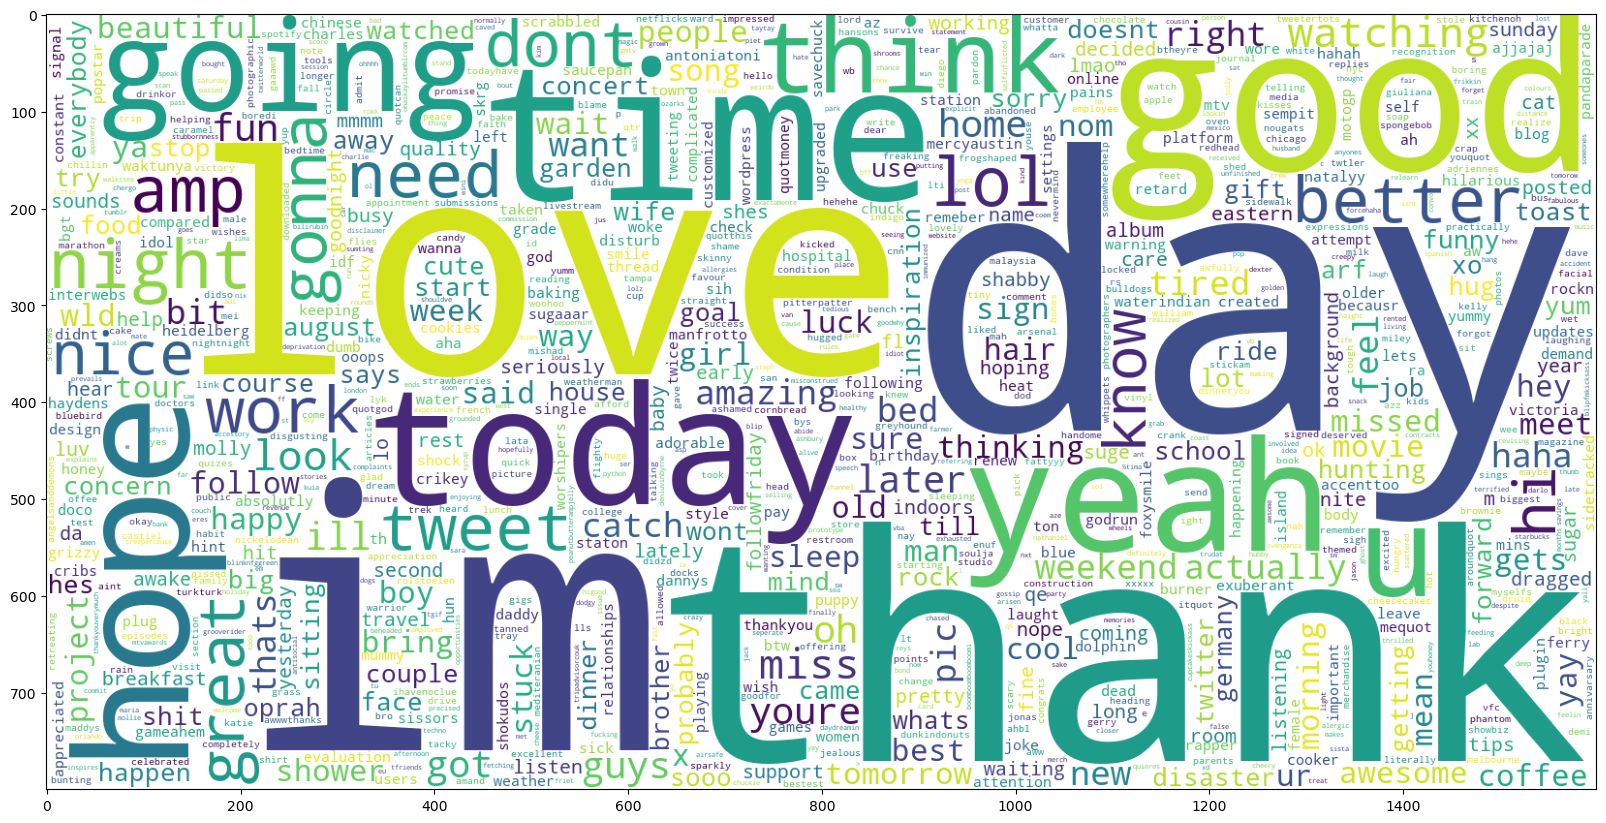

In [52]:
wordCloud(df.loc[df["target"] == 1, "text"],2000)

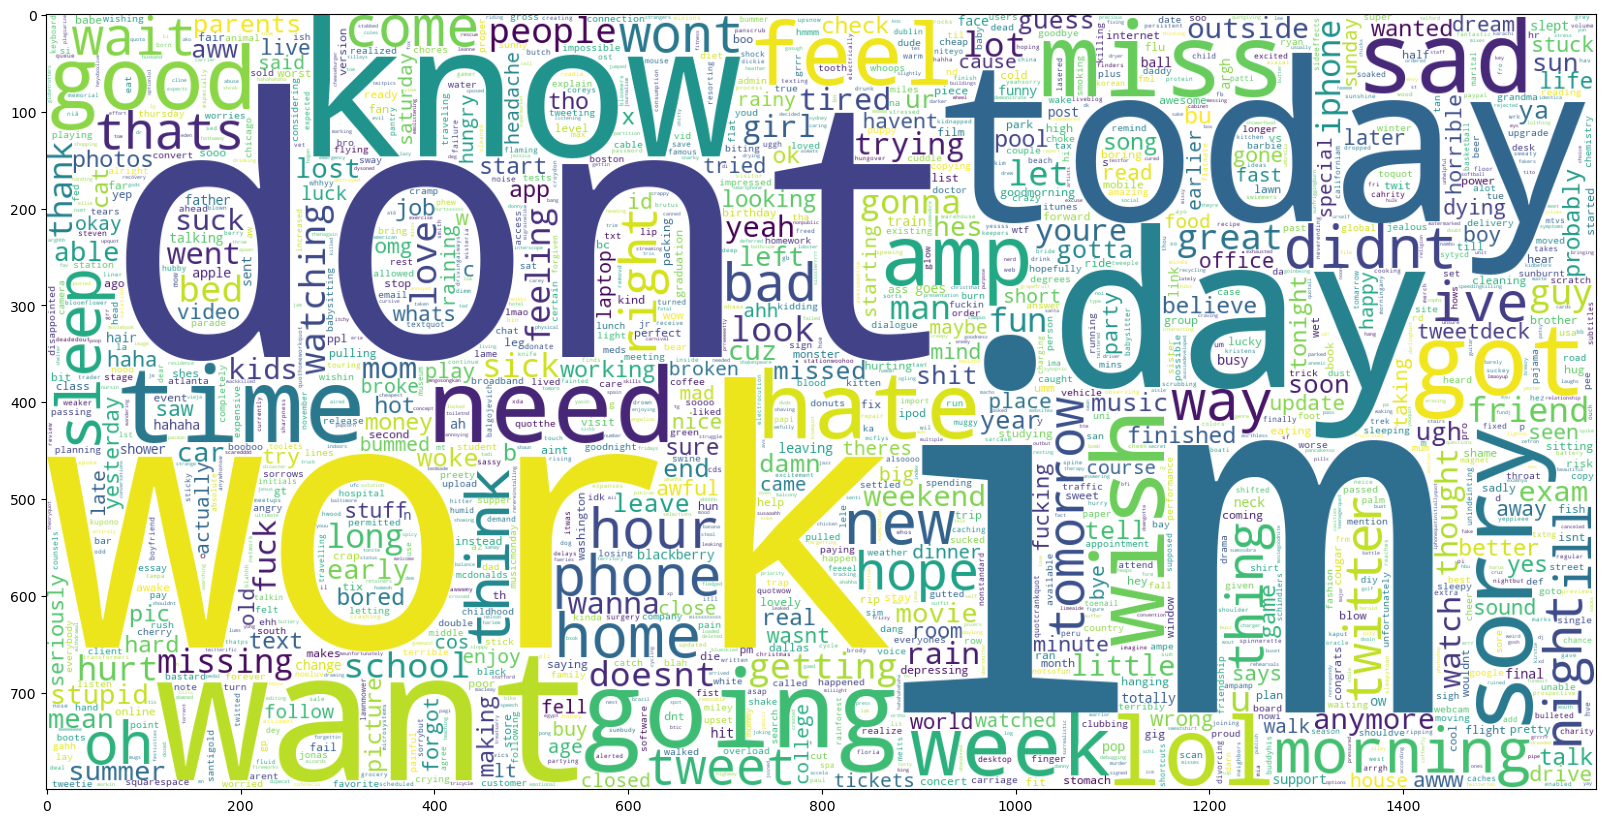

In [53]:
wordCloud(df.loc[df["target"] == 0, "text"], 2000)

In [54]:
df["text_length"] = df["text"].apply(len)

round(pd.DataFrame(df.groupby("target").text_length.mean()),2)

,text_length
target,
0,42.56
1,40.64


In [55]:
df_reduced = df.sample(frac =.10)
  
df_reduced

,target,text,tokenized_tweets,tokenized_tweets_stemmed,tokenized_tweets_stemmed_lemmatized,text_length
205654,0,work come eden bar soon im gonna hanging,,,,40
783641,0,ughh making resort pc immediately makes day lo...,,,,54
941187,1,disturb watching everybody stop tweeting,,,,40
141264,0,frightened going hospital mri scan survive twe...,,,,54
144371,0,starting memorial day weekend doctors office,,,,44
...,...,...,...,...,...,...
168991,0,ran accela unit tests time years failed,,,,39
200937,0,big worried hugs sent im sure pops wandering,,,,44
464072,0,getting emolistening songs remind kidbefore st...,,,,87
294969,0,dont know hes talking,,,,21


In [56]:
print( "The shape of the original dataset: " + str(df.shape))
print( "The shape of the reduced dataset: " + str(df_reduced.shape))

The shape of the original dataset: (1000, 6)
The shape of the reduced dataset: (100, 6)


In [57]:
X = df["tokenized_tweets_stemmed_lemmatized"]
y = df["target"]

X_reduced = df_reduced["tokenized_tweets_stemmed_lemmatized"]
y_reduced = df_reduced["target"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced,
                                                                                    test_size=0.15, random_state=100)

In [59]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

		 The training execution time of this model is 0.00 seconds 

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       0.00      0.00      0.00        34

    accuracy                           0.77       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.60      0.77      0.67       150

		The test execution time of this model is 0.05 seconds 



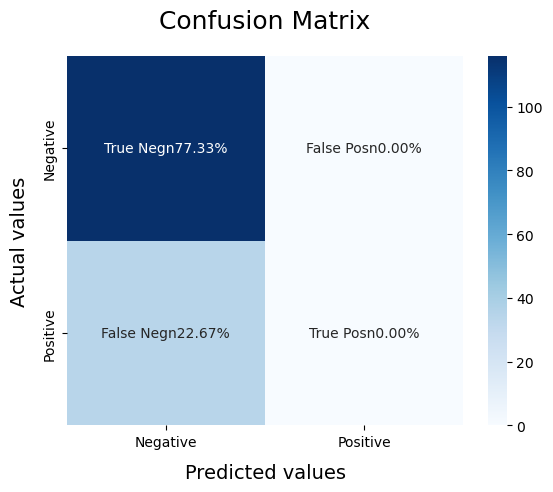

In [60]:
""" # Model-1 : Bernoulli Naive Bayes.
 """
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
import time

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

X_train.replace('', np.nan, inplace=True)
X_train.fillna(0, inplace=True)

X_test.replace('', np.nan, inplace=True)
X_test.fillna(0, inplace=True)

# Model training and timing
BNBmodel = BernoulliNB()
start1 = time.time()
BNBmodel.fit(X_train, y_train)
end1 = time.time()
print("\t\t The training execution time of this model is {:.2f} seconds \n".format(end1 - start1))

start2 = time.time()
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)
end2 = time.time()
print("\t\tThe test execution time of this model is {:.2f} seconds \n".format(end2 - start2))




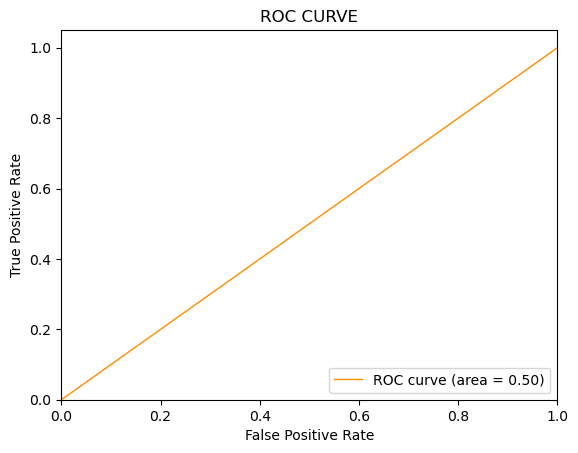

In [61]:
# Plot the ROC-AUC Curve for model-1 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

		The training execution time of this model is 0.01 seconds

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       0.00      0.00      0.00        34

    accuracy                           0.77       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.60      0.77      0.67       150

		The test execution time of this model is 0.02 seconds



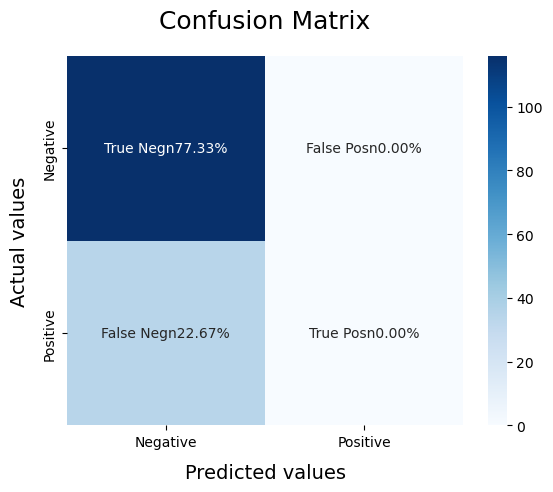

In [62]:
# Model-2 : SVM (Support Vector Machine).
SVCmodel = LinearSVC()
start1 = time.time()
SVCmodel.fit(X_train, y_train)
end1 = time.time()
print("\t\tThe training execution time of this model is {:.2f} seconds\n".format(end1-start1))
start2 = time.time()
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)
end2 = time.time()
print("\t\tThe test execution time of this model is {:.2f} seconds\n".format(end2-start2))

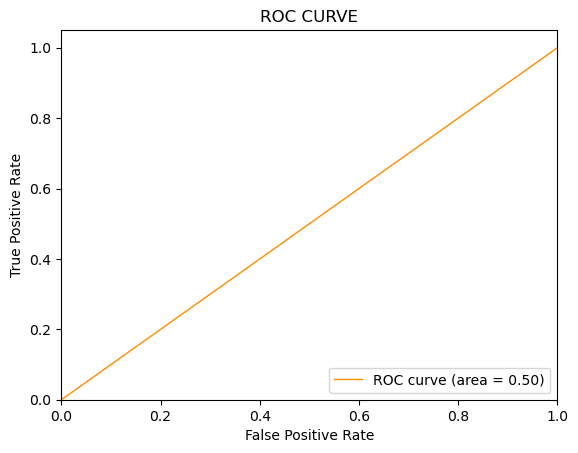

In [63]:
# Plot the ROC-AUC Curve for model-2 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

		The training execution time of this model is 1.29 seconds

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       116
           1       0.00      0.00      0.00        34

    accuracy                           0.77       150
   macro avg       0.39      0.50      0.44       150
weighted avg       0.60      0.77      0.67       150

		The test execution time of this model is 0.04 seconds



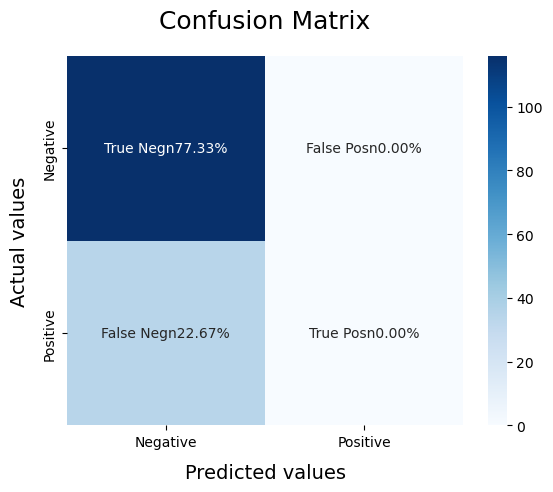

In [64]:
# Model-3 : Logistic Regression.
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
start1 = time.time()
LRmodel.fit(X_train, y_train)
end1 = time.time()
print("\t\tThe training execution time of this model is {:.2f} seconds\n".format(end1-start1))
start2 = time.time()
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
end2 = time.time()
print("\t\tThe test execution time of this model is {:.2f} seconds\n".format(end2-start2))

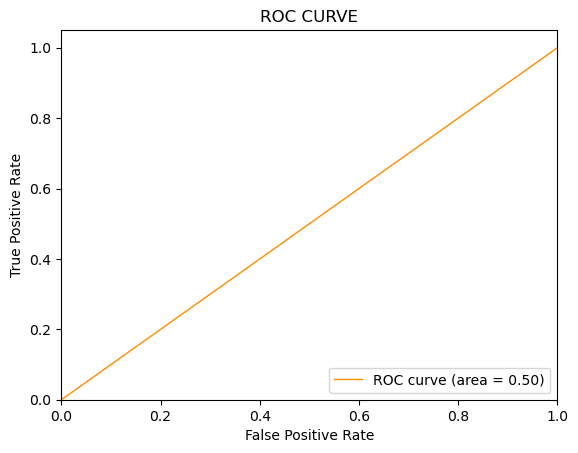

In [65]:
# Plot the ROC-AUC Curve for model-3 :
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

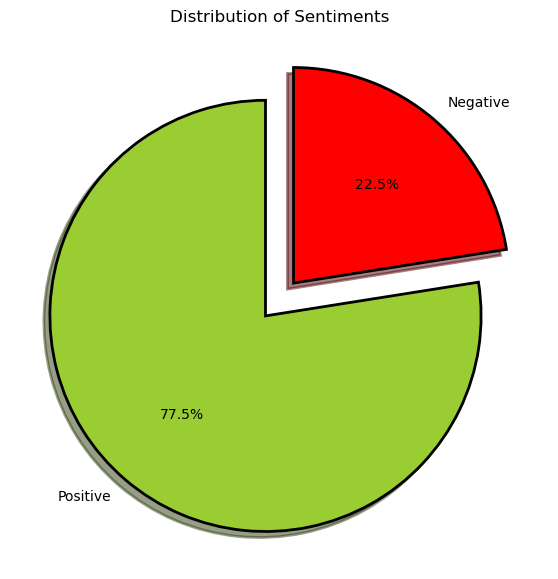

In [66]:
import matplotlib.pyplot as plt

sentiment_counts = df['target'].map({1: 'Positive', 0: 'Negative'}).value_counts()

colors = ["yellowgreen", "red"] 
explode = [0.1, 0.1]  

fig = plt.figure(figsize=(7, 7))
wp = {'linewidth': 2, 'edgecolor': "black"}

sentiment_counts.plot(
    kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
    startangle=90, wedgeprops=wp, explode=explode, labels=['Positive', 'Negative']
)

plt.title('Distribution of Sentiments')
plt.ylabel('')  
plt.show()


In [138]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report


In [178]:
df_pos = df[df['target'] == 1]
df_neg = df[df['target'] == 0]

num_pos = len(df_pos)
num_neg = len(df_neg)
print(f"Positive: {num_pos}, Negative: {num_neg}")

if num_pos == 0 or num_neg == 0:
    raise ValueError("Both classes (0 and 1) must be present.")

sample_size = min(num_pos, num_neg)
df_pos_sample = df_pos.sample(sample_size, random_state=42)
df_neg_sample = df_neg.sample(sample_size, random_state=42)

df_balanced = pd.concat([df_pos_sample, df_neg_sample])
df_balanced['label'] = df_balanced['target']  
df_balanced = df_balanced[['text', 'label']].sample(frac=1, random_state=42)

print(df_balanced['label'].value_counts()) 


Positive: 225, Negative: 775
label
0    225
1    225
Name: count, dtype: int64


In [180]:
from sklearn.model_selection import train_test_split

train_texts, test_texts, train_labels, test_labels = train_test_split(
    df_balanced['text'].tolist(),
    df_balanced['label'].tolist(),
    test_size=0.2,
    stratify=df_balanced['label'],
    random_state=42
)


In [182]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)


In [184]:
import torch
from torch.utils.data import Dataset

class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx]).long()
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
test_dataset = TweetDataset(test_encodings, test_labels)


In [188]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [192]:
from torch.utils.data import DataLoader
from torch.optim import AdamW

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
optimizer = AdamW(model.parameters(), lr=2e-5)

model.train()
for epoch in range(3):  
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f"Epoch {epoch+1} Loss: {total_loss:.4f}")


Epoch 1 Loss: 16.2852
Epoch 2 Loss: 14.9103
Epoch 3 Loss: 11.2135


In [194]:
from sklearn.metrics import classification_report

test_loader = DataLoader(test_dataset, batch_size=16)
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        batch['labels'] = batch['labels'].long()
        outputs = model(**batch)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(batch['labels'].cpu().numpy())

print(classification_report(
    all_labels, all_preds,
    labels=[0, 1],
    target_names=["Negative", "Positive"]
))


              precision    recall  f1-score   support

    Negative       0.63      0.38      0.47        45
    Positive       0.56      0.78      0.65        45

    accuracy                           0.58        90
   macro avg       0.59      0.58      0.56        90
weighted avg       0.59      0.58      0.56        90



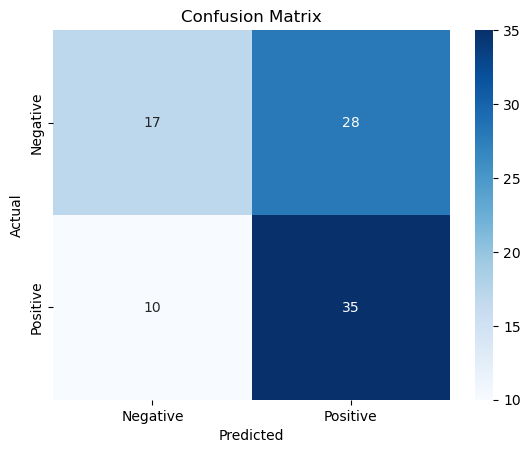

In [196]:
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
